In [2]:
from __future__ import print_function

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Dropout, BatchNormalization, AveragePooling2D, Concatenate

import numpy as np
from keras.datasets import cifar10, mnist, fashion_mnist
import skimage.transform





class VGG16:
    def __init__(self, input_shape, nlabels):
        self._input_shape = input_shape
        self._nlabels = nlabels
        self._model = self.initialize_model()

    def model(self):
        return self._model

    def initialize_model(self):
        print(self._input_shape)
        input_ = Input(shape=self._input_shape)
        
        #### 
        seq = Conv2D(64, (3,3), padding="same", activation="relu",
                name="b1.conv1")(input_)
        seq = Conv2D(64, (3,3), padding="same", activation="relu",
                name="b1.conv2")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b1.pool")(seq)

        ###
        seq = Conv2D(128, (3,3), padding="same", activation="relu",
                name="b2.conv1")(seq)
        seq = Conv2D(128, (3,3), padding="same", activation="relu",
                name="b2.conv2")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b2.pool")(seq)

        ###
        seq = Conv2D(256, (3,3), padding="same", activation="relu",
                name="b3.conv1")(seq)
        seq = Conv2D(256, (3,3), padding="same", activation="relu",
                name="b3.conv2")(seq)
        seq = Conv2D(256, (3,3), padding="same", activation="relu",
                name="b3.conv3")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b3.pool")(seq)

        ###
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b4.conv1")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b4.conv2")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b4.conv3")(seq)
        seq = MaxPooling2D((2,2), strides=(2, 2), name="b4.pool")(seq)

        ### 
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b5.conv1")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b5.conv2")(seq)
        seq = Conv2D(512, (3,3), padding="same", activation="relu",
                name="b5.conv3")(seq)
        # seq = MaxPooling2D((2,2), strides=(2, 2), name="b5.pool")(seq)
        seq = MaxPooling2D((1,1), strides=(2, 2), name="b5.pool")(seq)

        seq = Flatten(name="flatten")(seq)
        seq = Dense(units=4096,activation="relu", name="dense1")(seq)
        seq = Dense(units=4096,activation="relu", name="dense2")(seq)
        seq = Dense(units=self._nlabels, activation="softmax", name="dense_softmax")(seq)

        output_ = seq

        model = Model(input_, output_)
        model.compile(
                loss = keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(0.0001),
                metrics=['accuracy'],)
        return model




    



### VGG16
def vgg16_mnist():
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    y_train = keras.utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.to_categorical(y_test, nlabels)

    x_train= x_train/ 255.
    x_test= x_test/ 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    # reshape to 3 dims
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    input_shape = x_train.shape

    # initialize the model
    vgg = VGG16(input_shape[1:], nlabels)

    vgg.model().summary()

    hist = vgg.model().fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.2)
    res_eval = vgg.model().evaluate(x_test, y_test, batch_size=100)
    
    return (vgg, hist.history, res_eval)


def vgg16_cifar10():
    nlabels = 10
    # load dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()


    y_train = keras.utils.to_categorical(y_train, nlabels)
    y_test = keras.utils.to_categorical(y_test, nlabels)

    x_train= x_train/ 255.
    x_test= x_test/ 255.
    x_train= x_train.astype('float32')
    x_test= x_test.astype('float32')

    input_shape = x_train.shape

    # initialize the model
    vgg = VGG16(input_shape[1:], nlabels)
    
    vgg.model().summary()

    hist = vgg.model().fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.2)
    res_eval = vgg.model().evaluate(x_test, y_test, batch_size=100)
    
    return (vgg, hist.history, res_eval)



Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt


def plot_train(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(20)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


def print_evaluate(eval_value):
    print('eval loss : {}'.format(eval_value[0]))
    print('eval accuracy : {}'.format(eval_value[1]))


## VGG16

In [4]:
vgg_m = vgg16_mnist()

4423680/4422102 [==============================] - 1s 0us/step
(28, 28, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
b1.conv1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
b1.conv2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
b1.pool (MaxPooling2D)       (None, 14, 14, 64)        0         
_________________________________________________________________
b2.conv1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
b2.conv2 (Conv2D)            (None, 14, 14, 128)       147584    
__________________________________________________

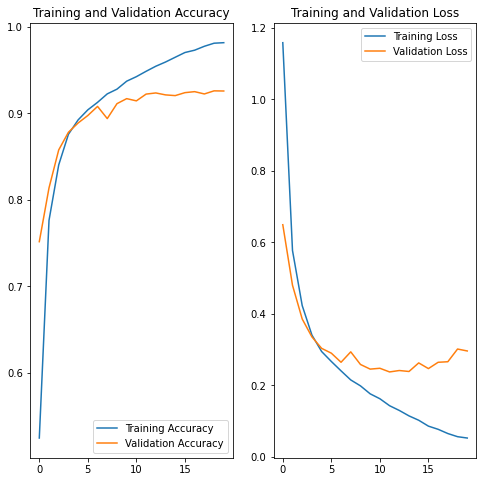

eval loss : 0.30347843512892725
eval accuracy : 0.9244999885559082


In [12]:
plot_train(vgg_m[1])
print_evaluate(vgg_m[2])

In [6]:
vgg_m[1]

{'accuracy': [0.5244167,
  0.77622914,
  0.8403958,
  0.87583333,
  0.8925,
  0.904125,
  0.91279167,
  0.92258334,
  0.92804164,
  0.9372708,
  0.9425,
  0.94870836,
  0.9545625,
  0.9594375,
  0.9649583,
  0.9704375,
  0.973125,
  0.9776458,
  0.9812083,
  0.9818125],
 'loss': [1.1587550847480694,
  0.5771763789157073,
  0.42311495744312805,
  0.3405905913872023,
  0.29451433148545525,
  0.26666813258392114,
  0.24039641469717027,
  0.21498327526884775,
  0.19842915368887284,
  0.17611477677710355,
  0.16236365572549402,
  0.14285648491155978,
  0.12961729337306072,
  0.1143786347975644,
  0.10218751486972906,
  0.08570754052974129,
  0.07683674054909109,
  0.06500030848255847,
  0.05618337912067849,
  0.05241399328515399],
 'val_accuracy': [0.7515833377838135,
  0.8138333559036255,
  0.8577499985694885,
  0.878166675567627,
  0.8889166712760925,
  0.8975833058357239,
  0.9080833196640015,
  0.8939999938011169,
  0.9112499952316284,
  0.9170833230018616,
  0.9144999980926514,
  0.922

In [7]:
vgg_c = vgg16_cifar10()

170500096/170498071 [==============================] - 2s 0us/step
(32, 32, 3)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
b1.conv1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
b1.conv2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
b1.pool (MaxPooling2D)       (None, 16, 16, 64)        0         
_________________________________________________________________
b2.conv1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
b2.conv2 (Conv2D)            (None, 16, 16, 128)       147584    
______________________________________________

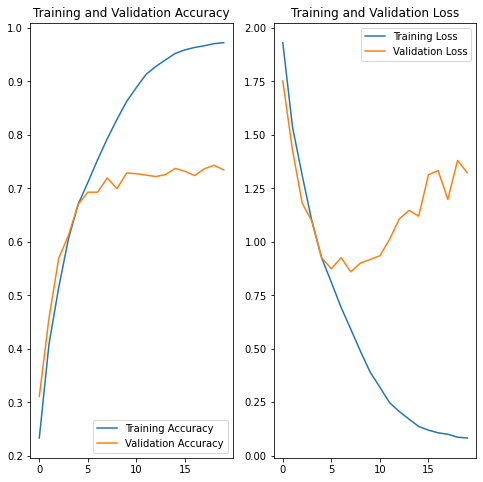

eval loss : 1.3799466967582703
eval accuracy : 0.727400004863739


In [11]:
plot_train(vgg_c[1])
print_evaluate(vgg_c[2])

In [9]:
vgg_c[1]

{'accuracy': [0.233575,
  0.409125,
  0.515,
  0.605475,
  0.6704,
  0.7112,
  0.753425,
  0.79305,
  0.82915,
  0.86275,
  0.88865,
  0.91335,
  0.928,
  0.9404,
  0.95235,
  0.959075,
  0.96355,
  0.966775,
  0.9707,
  0.9725],
 'loss': [1.9311308360099793,
  1.537432691156864,
  1.310591601729393,
  1.0956561227142811,
  0.9252162212133408,
  0.8106888638436794,
  0.6938022095710039,
  0.5915233065187931,
  0.48767308935523035,
  0.39038052670657636,
  0.31991409543901683,
  0.24746451757848262,
  0.20601019805297255,
  0.17058110858313738,
  0.1362874532211572,
  0.1189620589883998,
  0.10636929937172682,
  0.09974812570493669,
  0.08597644314402714,
  0.08206568537047133],
 'val_accuracy': [0.31119999289512634,
  0.4578999876976013,
  0.5697000026702881,
  0.6119999885559082,
  0.6700000166893005,
  0.6930999755859375,
  0.6930999755859375,
  0.7196000218391418,
  0.6998000144958496,
  0.7289999723434448,
  0.7275999784469604,
  0.7250999808311462,
  0.7222999930381775,
  0.726000